In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

%matplotlib inline
plt.style.use("bmh")

# Yahoo

In [26]:
from datetime import datetime
start = pd.to_datetime("1900-01-01")
ticker_name = "^SP500TR"
end = pd.to_datetime("2019-01-01")
# end = pd.to_datetime(datetime.now().date())
period, recession_cycles = "1mo", 6
benchmark_data = yf.download(ticker_name+" ^IRX ^TNX", start=start, end=end, interval=period)["Adj Close"].dropna()
snp500 = benchmark_data[[ticker_name]]
benchmark_data = benchmark_data.drop(ticker_name, axis = 1)
benchmark_data.head()

[*********************100%***********************]  3 of 3 completed


,^IRX,^TNX
Date,,
1988-02-01,5.62,8.16
1988-03-01,5.71,8.57
1988-04-01,5.98,8.87
1988-05-01,6.43,9.20
1988-06-01,6.56,8.82


In [27]:
recession = []
for x in range(len(snp500) - recession_cycles +1):
    t = snp500[ticker_name][x:x+recession_cycles]
    recession.append(t.is_monotonic_decreasing)
recession = recession + [False]*(recession_cycles-1)

snp500["recession"] = recession
snp500[snp500["recession"]].head()

,^SP500TR,recession
Date,,
1990-05-01,393.799988,True
2007-10-01,2423.669922,True
2011-04-01,2305.760010,True


In [28]:
benchmark_data["yield_curve_inverted"] = benchmark_data.apply(lambda x: x.is_monotonic_decreasing, axis = 1)
benchmark_data[benchmark_data["yield_curve_inverted"]].head()

,^IRX,^TNX,yield_curve_inverted
Date,,,
1989-05-01,8.61,8.600,True
2000-08-01,6.11,5.729,True
2000-09-01,6.03,5.778,True
2000-10-01,6.15,5.757,True
2000-11-01,6.01,5.439,True


Text(0.5, 1.0, '13wk/10yr Yield Curve Inversions, Recessions & Equity Market Performance, 1900 - 2019 (Period: 1mo)')

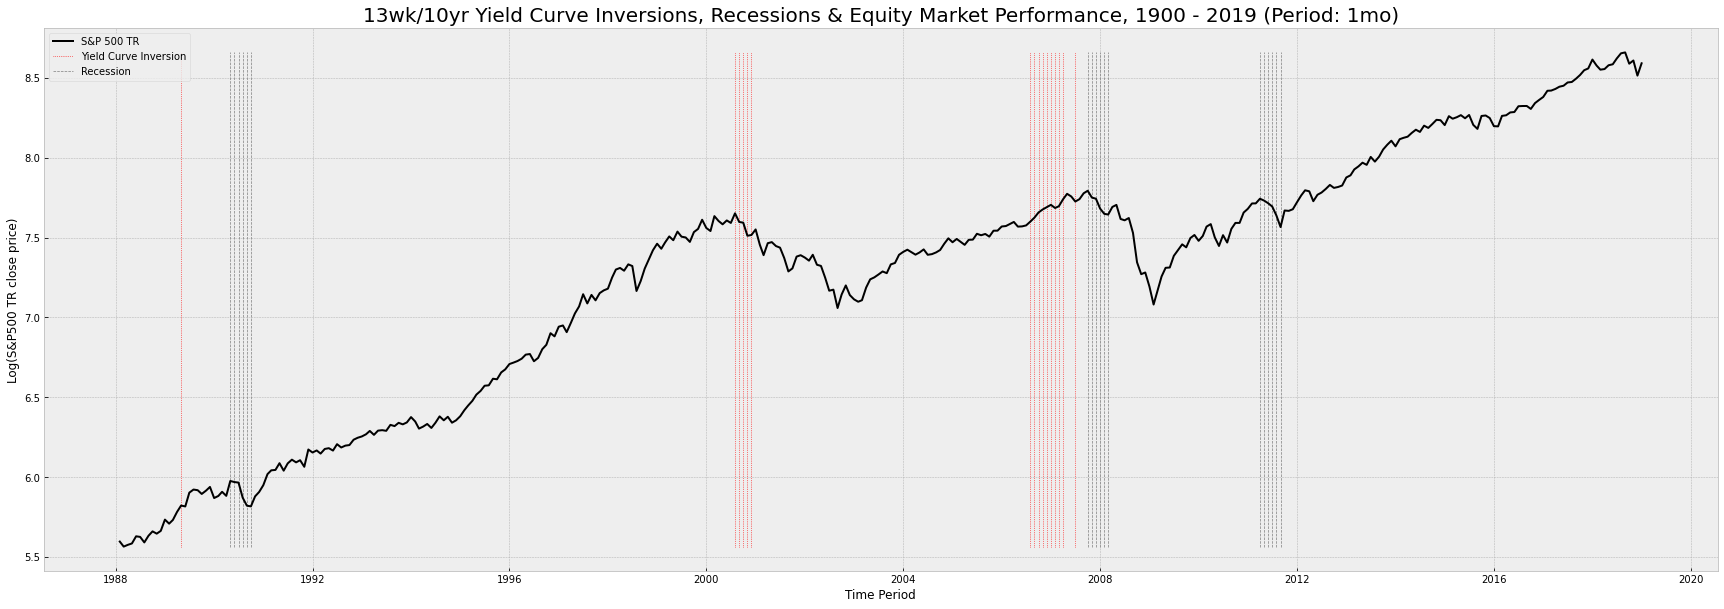

In [30]:
plt.figure().set_size_inches(30, 10,  forward=True)
plt.plot(np.log(snp500[ticker_name]), label = "S&P 500 TR", color = "black")
plt.vlines(benchmark_data[benchmark_data["yield_curve_inverted"]].index, colors= "red",
            ymin= np.log(snp500[ticker_name].min()), ymax= np.log(snp500[ticker_name].max()),
            linewidth = 0.7, linestyles = "dotted", label= "Yield Curve Inversion")
plt.vlines([t+pd.DateOffset(months = k) for t in snp500[snp500["recession"]].index for k in range(recession_cycles)],
            colors= "grey", ymin= np.log(snp500[ticker_name].min()), ymax= np.log(snp500[ticker_name].max()),
            linewidth = 0.7, linestyles = "dashed" , label= "Recession")
plt.legend()
plt.xlabel("Time Period")
plt.ylabel("Log(S&P500 TR close price)")
plt.title("13wk/10yr Yield Curve Inversions, Recessions & Equity Market Performance, {start} - {end} (Period: {period})".format(start = start.year, end = end.year, period = period), fontsize = 20)

***
***